In [1]:
import cv2
import random as rd
import numpy as np
import matplotlib.pyplot as plt

from generation_utilities import generate_paper
from hough_lines import count_hough_lines
from data_generator import blank_ruled_paper, printed_paper, handwritten_paper

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def imshow(image, title=None):
    fig, ax = plt.subplots(1, 1, figsize=(6.6, 8))
    ax.imshow(image, cmap="gray", vmin=0, vmax=255)
    if title: plt.suptitle(title)
    plt.show()

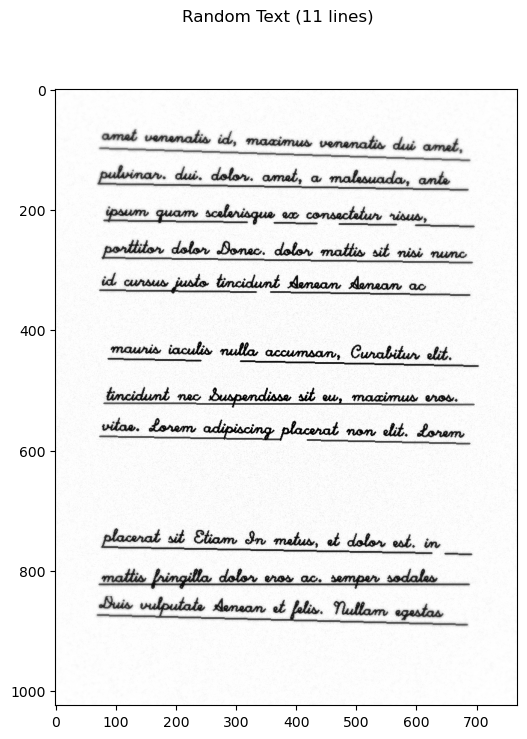

In [6]:
paper, count = generate_paper()
imshow(paper, f"Random Text ({count} lines)")

In [8]:
count_hough_lines(paper)

12

In [128]:
test_size = 100
errors = []
error_items = []
for i in range(test_size):
    paper, actual_count = generate_paper()
    predicted_count = count_hough_lines(paper, morphing_factor=20)
    error = abs(actual_count - predicted_count)
    errors.append(error)
    if error > 0: error_items.append([paper, actual_count])

(array([43.,  0.,  0., 39.,  0.,  0., 15.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

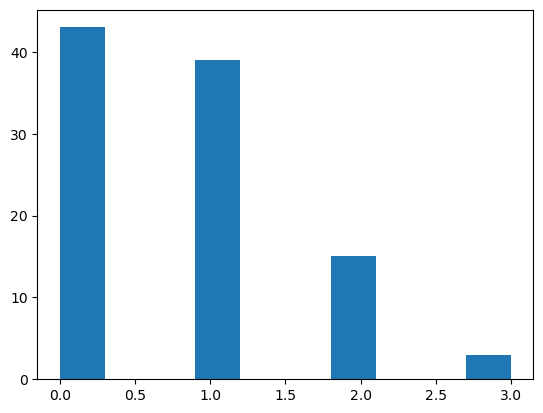

In [129]:
plt.hist(errors)

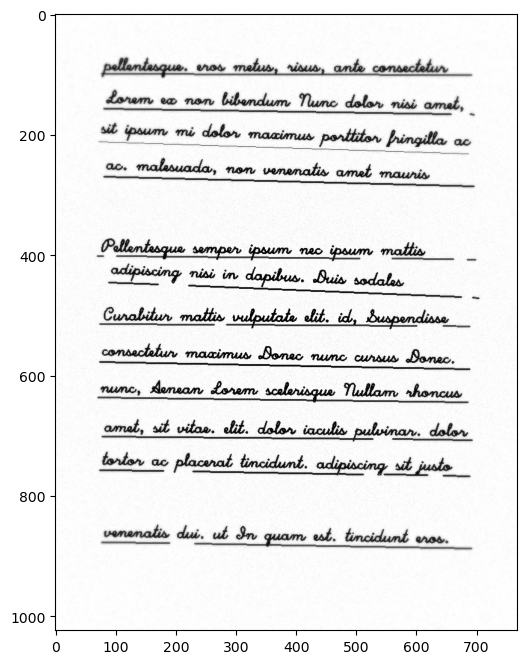

Ground Tructh 12
Counted 13


In [114]:
image, g_count = error_items[0]
imshow(image)
c_count, steps = count_hough_lines(image, morphing_factor=40, return_intermediate_steps=True)
print("Ground Tructh", g_count)
print("Counted", c_count)

In [106]:
steps.keys()

dict_keys(['original', 'gray-scaled', 'blurred', 'thresholded', 'morphed', 'edged', 'all lines', 'merged lines'])

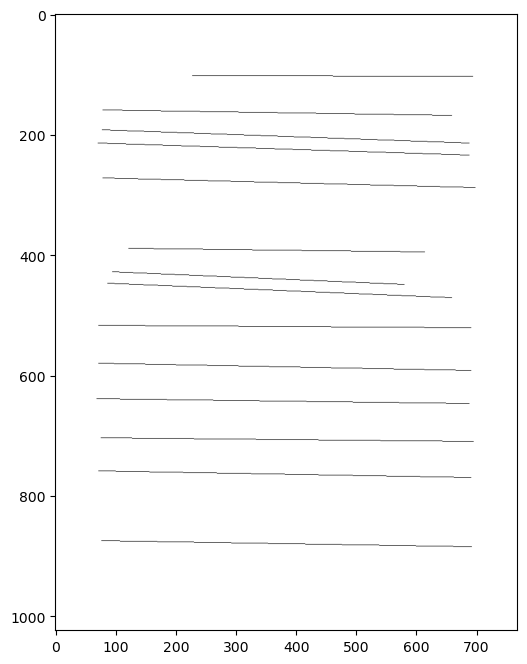

In [113]:
imshow(steps['merged lines'])

In [4]:
roll, name = "MT2025732", "Anirudh Sharma"

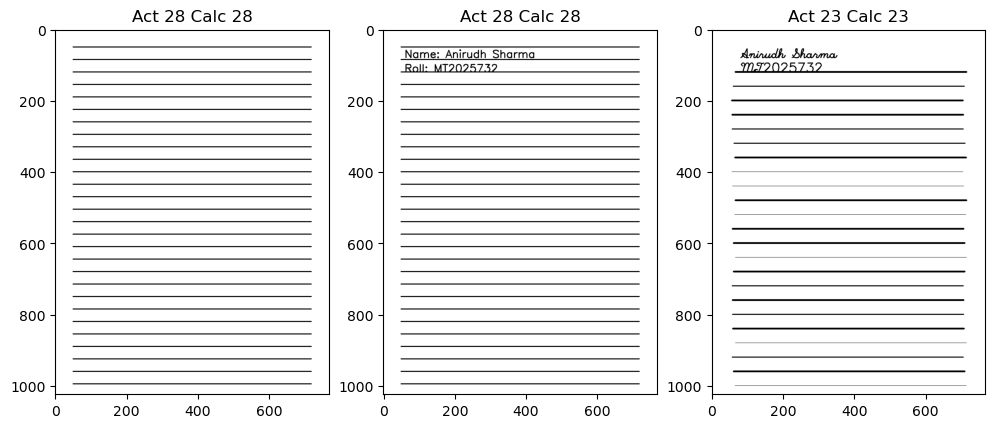

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 8))
for index, (image, gt) in enumerate([
    blank_ruled_paper(roll, return_gt=True),
    printed_paper(roll, name, roll, return_gt=True),
    handwritten_paper(roll, name, roll, return_gt=True)]):
    axs[index].imshow(image, cmap="gray", vmin=0, vmax=255)
    axs[index].set_title(f"Act {gt} Calc {count_hough_lines(image, morphing_factor=50)}")
plt.show()

In [73]:
test = handwritten_paper(roll, name, roll)

In [74]:
c_count, steps = count_hough_lines(test, return_intermediate_steps=True)

In [75]:
c_count

23

In [76]:
steps.keys()

dict_keys(['original', 'gray-scaled', 'blurred', 'thresholded', 'morphed', 'edged', 'all lines', 'merged lines'])

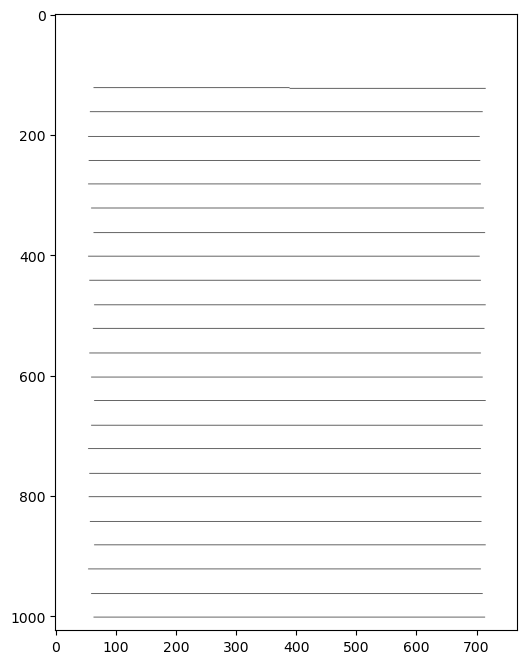

In [83]:
imshow(steps['merged lines'])